# Import Required Library

In [1]:
import pandas as pd # import pandas library
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("data.csv") # load csv file

In [3]:
df.shape # no of rows and columns

(506, 14)

In [4]:
df.head() # see head of the data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.tail() # see tail of the data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [6]:
df.info()  # info of all data , there are few null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
df.isnull().sum() # only RM has null values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
df['RM'].describe()

count    501.000000
mean       6.284341
std        0.705587
min        3.561000
25%        5.884000
50%        6.208000
75%        6.625000
max        8.780000
Name: RM, dtype: float64

In [9]:
df['RM'].mode()

0    5.713
1    6.127
2    6.167
3    6.229
4    6.405
5    6.417
dtype: float64

In [10]:
df['RM'].fillna(6,inplace=True)

In [11]:
df.isnull().sum().sum()

0

In [12]:
df.describe() # all details of data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.281532,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702649,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.194000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Co-relations

In [13]:
df.corr()  #co-relations between each attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.217503,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311261,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.390342,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.092452,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.300229,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.217503,0.311261,-0.390342,0.092452,-0.300229,1.000000,-0.240317,0.200462,-0.207998,-0.289784,-0.356157,0.126244,-0.614556,0.696059
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240317,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.200462,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.207998,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.289784,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


# CRIM Attribute

In [14]:
df['CRIM'].describe() #details of CRIM 

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677082
max       88.976200
Name: CRIM, dtype: float64

(array([439.,  44.,  14.,   1.,   3.,   2.,   0.,   1.,   1.,   1.]),
 array([6.3200000e-03, 8.9033080e+00, 1.7800296e+01, 2.6697284e+01,
        3.5594272e+01, 4.4491260e+01, 5.3388248e+01, 6.2285236e+01,
        7.1182224e+01, 8.0079212e+01, 8.8976200e+01]),
 <BarContainer object of 10 artists>)

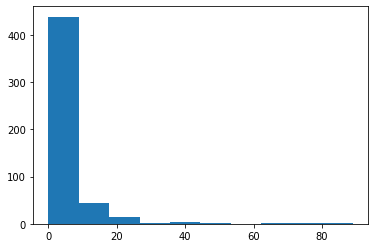

In [15]:
plt.hist(df['CRIM'])

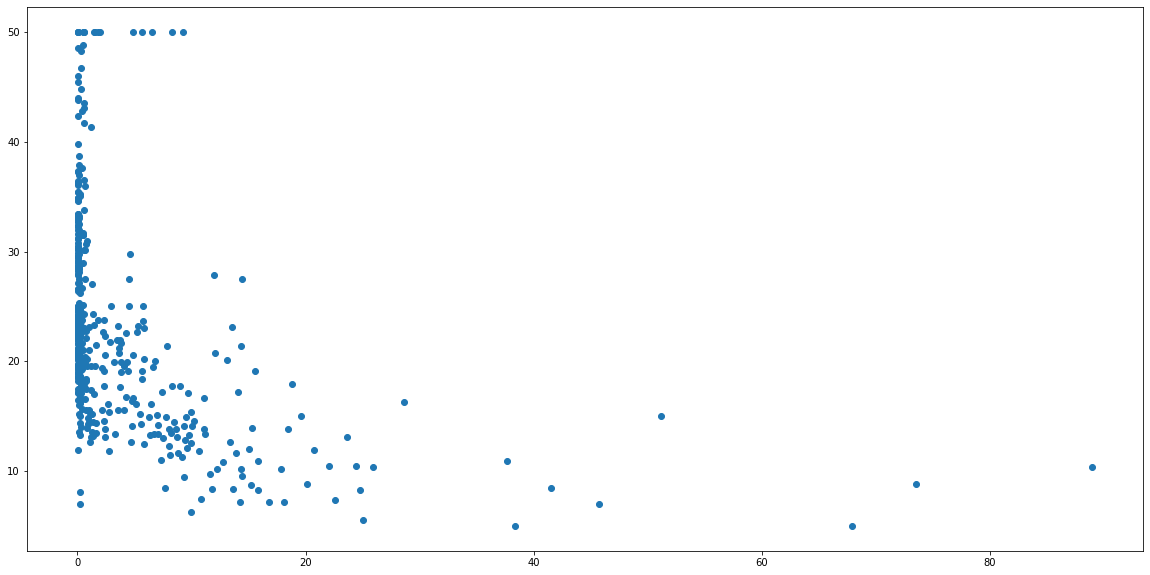

In [16]:
plt.figure(figsize=(20,10))
plt.scatter(df['CRIM'],df['MEDV'])

# ZN Attribute

In [17]:
df['ZN'].describe()

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64

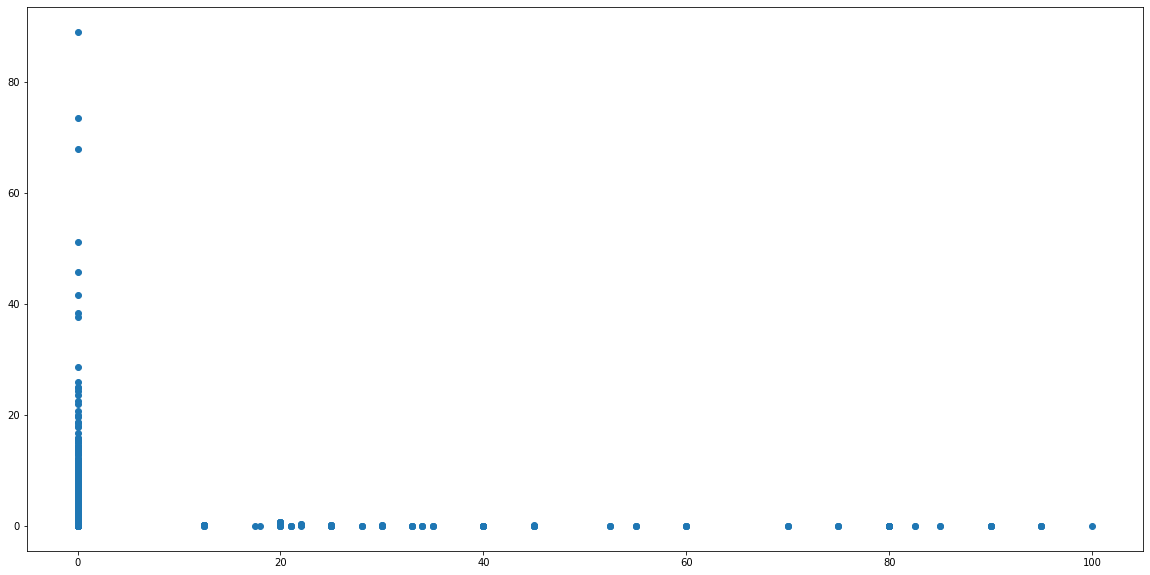

In [18]:
plt.figure(figsize=(20,10))
plt.scatter(df['ZN'],df['CRIM'])

(array([372.,  12.,  48.,  16.,  13.,   6.,   4.,   6.,  19.,  10.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

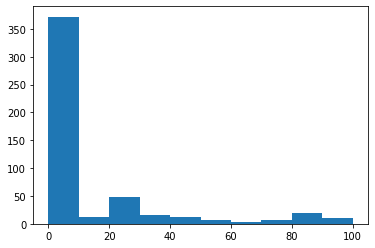

In [19]:
plt.hist(df['ZN'])

# INDUS Attribute

In [20]:
df['INDUS'].describe()

count    506.000000
mean      11.136779
std        6.860353
min        0.460000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: INDUS, dtype: float64

(array([ 56.,  95.,  99.,  44.,  20.,   3., 132.,  45.,   0.,  12.]),
 array([ 0.46 ,  3.188,  5.916,  8.644, 11.372, 14.1  , 16.828, 19.556,
        22.284, 25.012, 27.74 ]),
 <BarContainer object of 10 artists>)

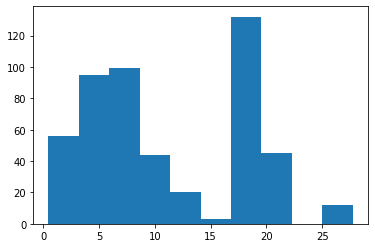

In [21]:
plt.hist(df['INDUS'])

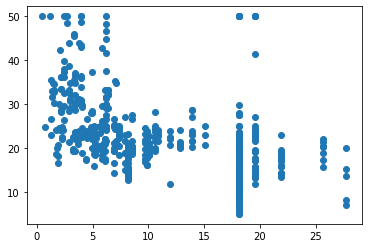

In [22]:
plt.scatter(df['INDUS'],df['MEDV'])

# CHAS Attribute

In [23]:
df['CHAS'].describe()

count    506.000000
mean       0.069170
std        0.253994
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: CHAS, dtype: float64

(array([471.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  35.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

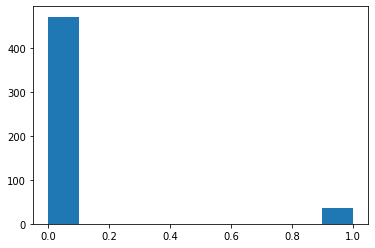

In [24]:
plt.hist(df['CHAS'])

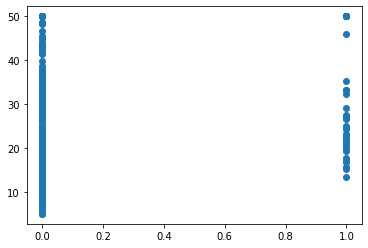

In [25]:
plt.scatter(df['CHAS'],df['MEDV'])

# NOX Attribute

In [26]:
df['NOX'].describe()

count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: NOX, dtype: float64

(array([75., 80., 89., 60., 78., 30., 57., 21.,  0., 16.]),
 array([0.385 , 0.4336, 0.4822, 0.5308, 0.5794, 0.628 , 0.6766, 0.7252,
        0.7738, 0.8224, 0.871 ]),
 <BarContainer object of 10 artists>)

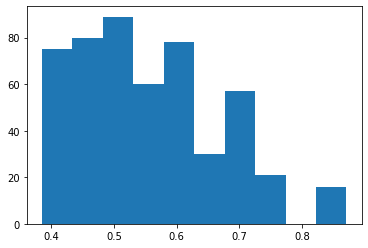

In [27]:
plt.hist(df['NOX'])

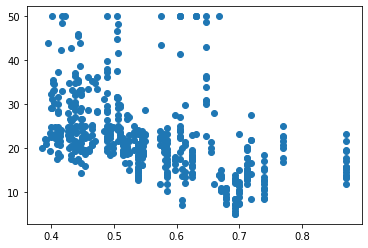

In [28]:
plt.scatter(df['NOX'],df['MEDV'])

# RM Attribute

In [29]:
df['RM'].describe()

count    506.000000
mean       6.281532
std        0.702649
min        3.561000
25%        5.885500
50%        6.194000
75%        6.618750
max        8.780000
Name: RM, dtype: float64

(array([  2.,   4.,  14.,  45., 180., 149.,  68.,  22.,  13.,   9.]),
 array([3.561 , 4.0829, 4.6048, 5.1267, 5.6486, 6.1705, 6.6924, 7.2143,
        7.7362, 8.2581, 8.78  ]),
 <BarContainer object of 10 artists>)

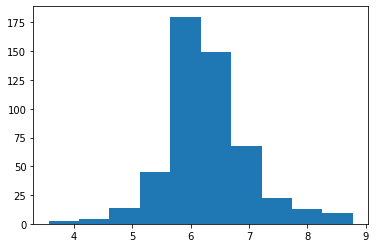

In [30]:
plt.hist(df['RM'])

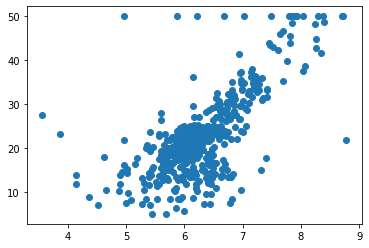

In [31]:
plt.scatter(df['RM'],df['MEDV'])

# AGE Attribute

In [32]:
df['AGE'].describe()

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64

(array([ 14.,  31.,  29.,  42.,  32.,  38.,  39.,  42.,  71., 168.]),
 array([  2.9 ,  12.61,  22.32,  32.03,  41.74,  51.45,  61.16,  70.87,
         80.58,  90.29, 100.  ]),
 <BarContainer object of 10 artists>)

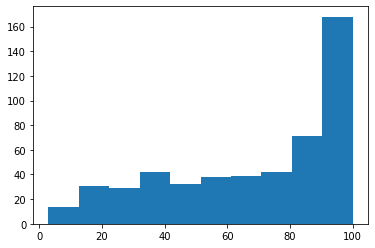

In [33]:
plt.hist(df['AGE'])

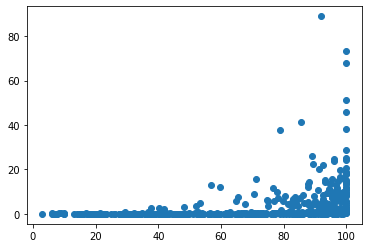

In [34]:
plt.scatter(df['AGE'],df['CRIM'])

# DIS Attribute

In [35]:
df['DIS'].describe()

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: DIS, dtype: float64

(array([150., 111.,  81.,  61.,  46.,  26.,  19.,   7.,   4.,   1.]),
 array([ 1.1296 ,  2.22929,  3.32898,  4.42867,  5.52836,  6.62805,
         7.72774,  8.82743,  9.92712, 11.02681, 12.1265 ]),
 <BarContainer object of 10 artists>)

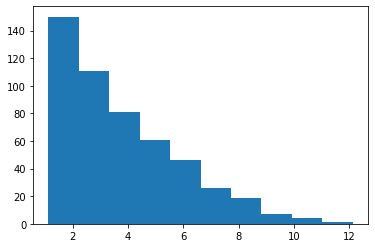

In [36]:
plt.hist(df['DIS'])

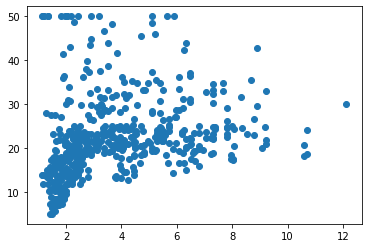

In [37]:
plt.scatter(df['DIS'],df['MEDV'])

# RAD Attribute

In [38]:
df['RAD'].describe()

count    506.000000
mean       9.549407
std        8.707259
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: RAD, dtype: float64

(array([ 82., 225.,  43.,  24.,   0.,   0.,   0.,   0.,   0., 132.]),
 array([ 1. ,  3.3,  5.6,  7.9, 10.2, 12.5, 14.8, 17.1, 19.4, 21.7, 24. ]),
 <BarContainer object of 10 artists>)

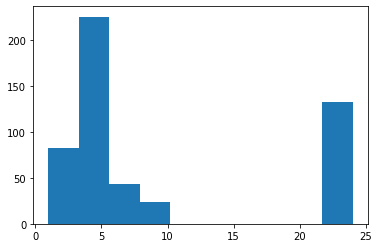

In [39]:
plt.hist(df['RAD'])

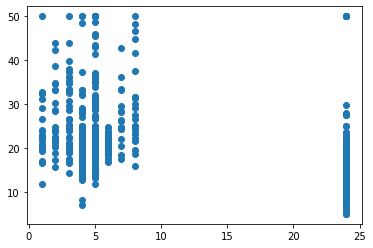

In [40]:
plt.scatter(df['RAD'],df['MEDV'])

# TAX Attribute

In [41]:
df['TAX'].describe()

count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: TAX, dtype: float64

(array([ 54., 100., 108.,  32.,  74.,   1.,   0.,   0.,   0., 137.]),
 array([187. , 239.4, 291.8, 344.2, 396.6, 449. , 501.4, 553.8, 606.2,
        658.6, 711. ]),
 <BarContainer object of 10 artists>)

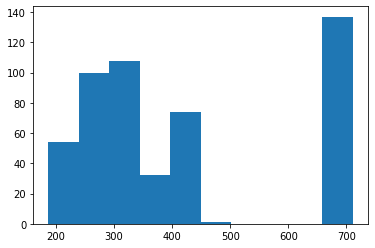

In [42]:
plt.hist(df['TAX'])

<AxesSubplot:xlabel='TAX', ylabel='MEDV'>

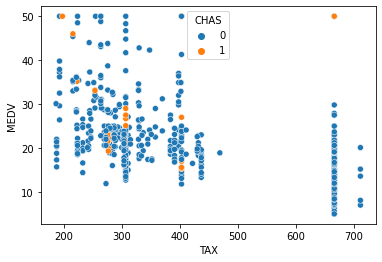

In [43]:
sns.scatterplot(x="TAX",y="MEDV",data=df,hue="CHAS")

# PTRATIO Attribute

In [44]:
df['PTRATIO'].describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <BarContainer object of 10 artists>)

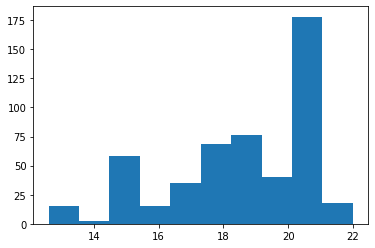

In [45]:
plt.hist(df['PTRATIO'])

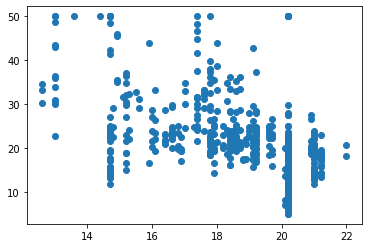

In [46]:
plt.scatter(df['PTRATIO'],df['MEDV'])

# B Attribute

In [47]:
df['B'].describe()

count    506.000000
mean     356.674032
std       91.294864
min        0.320000
25%      375.377500
50%      391.440000
75%      396.225000
max      396.900000
Name: B, dtype: float64

(array([ 18.,   6.,  10.,   2.,   3.,   3.,   7.,  11.,  33., 413.]),
 array([3.20000e-01, 3.99780e+01, 7.96360e+01, 1.19294e+02, 1.58952e+02,
        1.98610e+02, 2.38268e+02, 2.77926e+02, 3.17584e+02, 3.57242e+02,
        3.96900e+02]),
 <BarContainer object of 10 artists>)

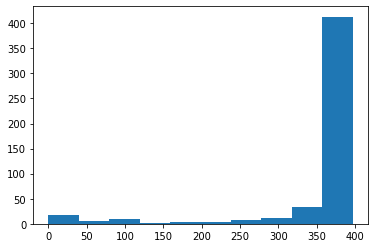

In [48]:
plt.hist(df['B'])

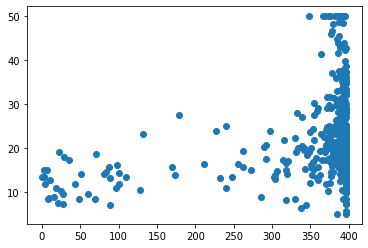

In [49]:
plt.scatter(df['B'],df['MEDV'])

# LSTAT Attribute

In [50]:
df['LSTAT'].describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: LSTAT, dtype: float64

(array([ 75., 108.,  99.,  84.,  64.,  30.,  21.,  16.,   4.,   5.]),
 array([ 1.73 ,  5.354,  8.978, 12.602, 16.226, 19.85 , 23.474, 27.098,
        30.722, 34.346, 37.97 ]),
 <BarContainer object of 10 artists>)

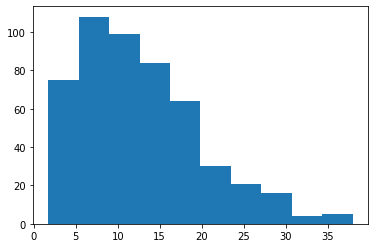

In [51]:
plt.hist(df['LSTAT'])

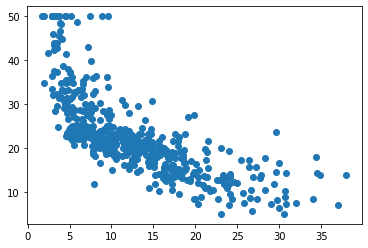

In [52]:
plt.scatter(df['LSTAT'],df['MEDV'])

# MEDV Attribute

In [53]:
df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [54]:
df[df['MEDV']<=40].shape[0]/df.shape[0]*100

93.87351778656127

In [55]:
df1=df[df['MEDV']<=40]

(array([ 16.,  27.,  61.,  69., 119.,  93.,  31.,  27.,  23.,   9.]),
 array([ 5.  ,  8.48, 11.96, 15.44, 18.92, 22.4 , 25.88, 29.36, 32.84,
        36.32, 39.8 ]),
 <BarContainer object of 10 artists>)

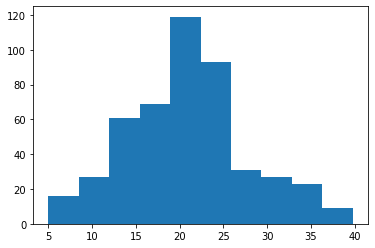

In [56]:
plt.hist(df1['MEDV'])

In [57]:
df2=df1.drop(['CHAS','DIS'],axis=1)

# Train-Test Split

In [58]:
X=df2.drop(['MEDV'],axis=1)
y=df2['MEDV']

In [59]:
df2.shape

(475, 12)

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=23)

# Linear Regression Model

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr=LinearRegression()
lr.fit(X_train,y_train)
lr_score=lr.score(X_test,y_test)
rmse=np.sqrt(mean_squared_error(y_test,lr.predict(X_test)))
lr_score,rmse

(0.7518216968075991, 3.548150697523057)

# DecisionTreeRegressor Model

In [62]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt_score=dt.score(X_test,y_test)
rmse=np.sqrt(mean_squared_error(y_test,dt.predict(X_test)))
dt_score,rmse

(0.732828532632889, 3.6814184909166685)

# RandomForestRegressor Model

In [63]:
from sklearn.ensemble import RandomForestRegressor
lfr=RandomForestRegressor()
lfr.fit(X_train,y_train)
lfr_score=lfr.score(X_test,y_test)
rmse=np.sqrt(mean_squared_error(y_test,lfr.predict(X_test)))
lfr_score,rmse

(0.8815435260965868, 2.4513174223798835)

# Save Model

In [64]:
import joblib
joblib.dump(lfr,'check_house_price')
model=joblib.load('check_house_price')
model.predict(X_test)

array([15.122, 14.523, 19.422, 30.678, 20.8  , 14.501, 23.179, 30.31 ,
       22.797, 34.755,  8.211, 19.368,  9.   , 24.292, 29.207, 19.278,
       21.31 , 20.219, 21.25 , 20.705, 10.742, 19.991, 21.846, 23.196,
       11.516, 14.424, 11.265, 19.741, 23.106, 22.705, 24.274, 22.194,
       20.169, 14.471, 33.549, 16.937, 19.591, 19.586,  7.923,  9.642,
       20.232,  8.849, 30.488, 11.193, 15.594, 12.38 , 32.056, 15.478,
       28.125, 11.294,  9.912, 20.334, 21.026, 11.831,  9.513, 16.981,
       15.808, 15.274, 19.502, 20.336, 20.478, 33.204, 11.322, 13.9  ,
       30.503, 34.72 , 21.61 , 21.08 , 21.381, 24.454, 18.021, 26.34 ,
       16.056, 18.594, 32.85 , 22.17 , 29.15 , 22.677, 22.76 , 21.429,
       18.651, 19.697, 32.494, 21.467, 11.671, 20.761,  8.312, 10.153,
       20.985, 23.577, 23.146, 21.304, 21.199, 21.037, 14.753])